# **Project Title: Mobile Price Range Prediction**

---



**Problem Description**

In the competitive mobile phone market companies want to understand sales of mobile phones and factors which drives the prices. The objective is to find out some relation between the features of a mobile phone(eg: RAM, Internal memory,etc) and its selling price. In this problem, we donot have to predict the actual price but a price range indicating how high the price is.

**Dataset Description**

This Dataset contains informations about features of phones(Battery capacity, Microprocessor, Camera megpixals, RAM, Internal Memory etc.) 

**Attribute Information**



*   Battery_power: Battery capacity in mAh
*   Blue: Has a bluetooth or not

*   Clock_speed: Speed at which microprocessor executes instructions
*   Dual_sim: Has dual sim support or not

*   Fc: Front camera megapixals 
*   Four_g: Has 4G or not

*   Int_memory: Internal memory capacity
*   M_dep: Mobile depth in cm

*   Mobile_wt: Weight of Mobile phone
*   N_cores: No.of cores in the processor

*   Pc: Primary camera megapixals
*   Px_height: Pixal resolution height

*   Px_width: Pixal resolution width
*   RAM: Random Access Memory

*   Sc_h: Screen height
*   Sc_w: Screen width

*   Talk_time: Longest that a single battery can last over a call
*   Three_g: Has 3G or not

*   Wifi: Has wifi or not
*   Price_range: This represents the value of mobile phone(0: low cost, 1: medium cost, 2: High cost, 3: Very high cost)























In [ ]:
#importing the libraries required to load the data and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#mounting the dataset
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Copy of data_mobile_price_range.csv')

Mounted at /content/drive


Understanding the Data

In [ ]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [ ]:
#manipulating the display of Dataset
pd.set_option('display.max_rows',10) #here displaying max rows 10
pd.set_option('display.max_columns', 100) #here displaying max columns 100

In [ ]:
df.shape

(2000, 21)

In [ ]:
df.size


42000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There are no null values in the dataset 

In [ ]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

# EDA (Exploratory Data Analysis)

<function matplotlib.pyplot.show(*args, **kw)>

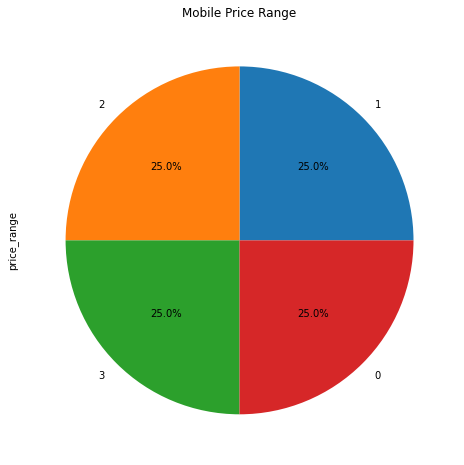

In [ ]:
#Ploting a piechart showing the percentage of distribution of Mobile phones in each price range
plt.figure(figsize=(8,8))
df.price_range.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Mobile Price Range')
plt.show

There are equal number of mobile phones from each price range in this dataset

**Battery Power**

<function matplotlib.pyplot.show(*args, **kw)>

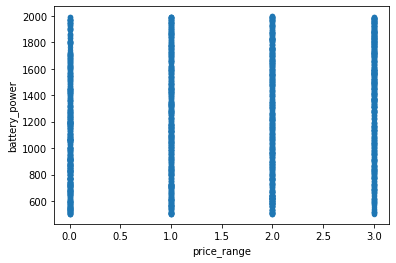

In [ ]:
#creating a scatter plot for price range with battery power
df.plot(x='price_range',y='battery_power',kind='scatter')
plt.show

Text(0, 0.5, 'Battery Power (mAh)')

<Figure size 576x720 with 0 Axes>

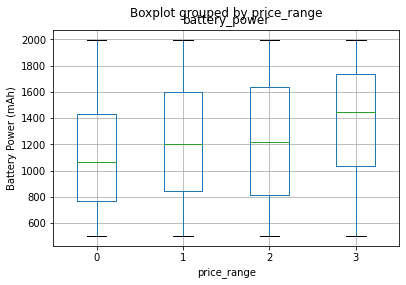

In [ ]:
#creating a box plot for battery power vs price range 
plt.figure(figsize=(8,10))
df.boxplot(by='price_range', column=['battery_power'])
plt.ylabel('Battery Power (mAh)')

The boxplot shows that there is a gradual increase in Price range with increase in Battery power.

**Bluetooth**

Text(0.5, 1.0, 'Percentage of Mobile phones from each price ranges with Bluetooth available ')

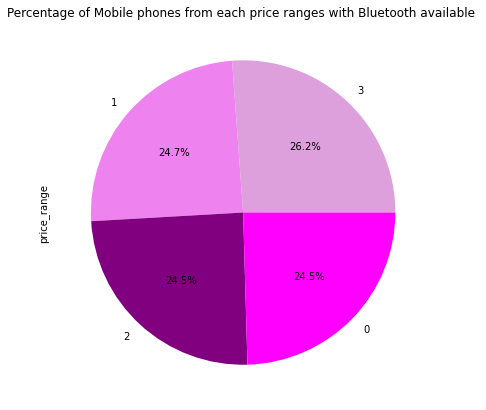

In [ ]:
#Creating a pie chart depicting percentage of mobile phones from each price ranges with Bluetooth available
Blth= df[df.blue==1]
plt.figure(figsize=(7,7))
Blth.price_range.value_counts().plot.pie(colors=('plum','violet','purple','magenta'),autopct='%1.1f%%')
plt.title('Percentage of Mobile phones from each price ranges with Bluetooth available ')



Bluetooth is not an important feature for predictions as it is almost evenly distributed among all the price ranges



**Clock speed**

<function matplotlib.pyplot.show(*args, **kw)>

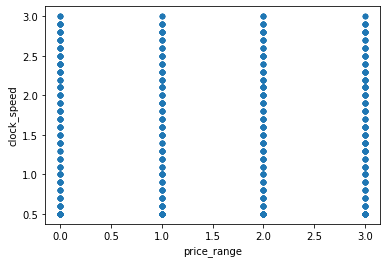

In [ ]:
#Creating a scatter plot for clock speed vs price range
df.plot(x='price_range',y='clock_speed',kind='scatter')
plt.show

Text(0, 0.5, 'Clock speed')

<Figure size 576x720 with 0 Axes>

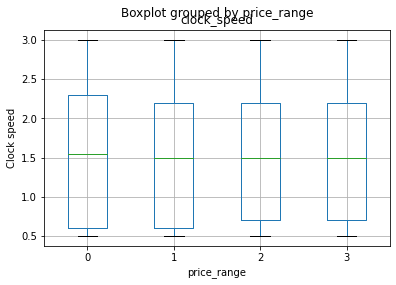

In [ ]:
#creating a box plot for clock speed vs price range
plt.figure(figsize=(8,10))
df.boxplot(by='price_range', column=['clock_speed'])
plt.ylabel('Clock speed')

**Dual Sim**

Text(0.5, 1.0, 'Percentage of Mobile phones from each price ranges with Dual sim available ')

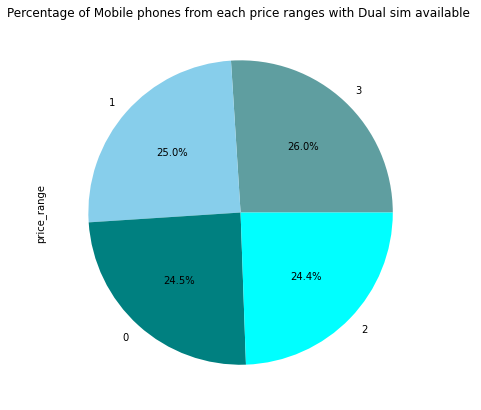

In [ ]:
#Creating a pie chart depicting percentage of mobile phones from each price ranges with Dual sim available
DlSim= df[df.dual_sim==1]
plt.figure(figsize=(7,7))
DlSim.price_range.value_counts().plot.pie(colors=('cadetblue','skyblue','teal','aqua'),autopct='%1.1f%%')
plt.title('Percentage of Mobile phones from each price ranges with Dual sim available ')


Dual Sim is not an important feature for predictions as it is almost evenly distributed among all the price ranges.

**Primary camera and Front camera**

<function matplotlib.pyplot.show(*args, **kw)>

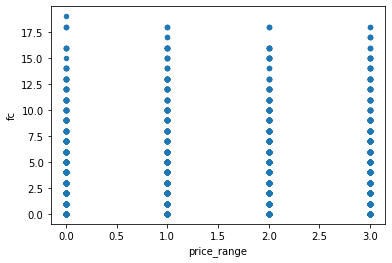

In [ ]:
#Creating a scatter plot for Front Camera megapixals vs Price range
df.plot(x='price_range',y='fc',kind='scatter')
plt.show

Text(0, 0.5, 'Front camera')

<Figure size 576x720 with 0 Axes>

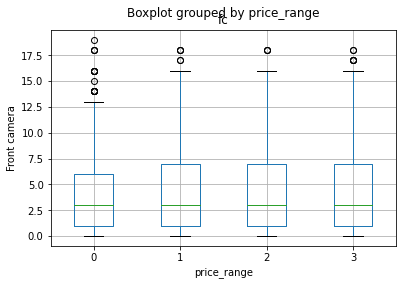

In [ ]:
#creating a box plot for front camera megapixals vs price range
plt.figure(figsize=(8,10))
df.boxplot(by='price_range', column=['fc'])
plt.ylabel('Front camera')

<function matplotlib.pyplot.show(*args, **kw)>

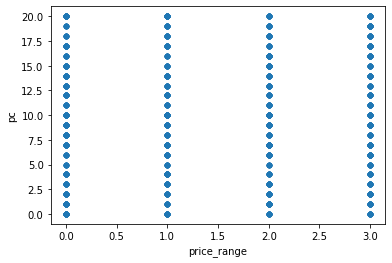

In [ ]:
df.plot(x='price_range',y='pc',kind='scatter')
plt.show

Text(0, 0.5, 'Primary camera')

<Figure size 576x720 with 0 Axes>

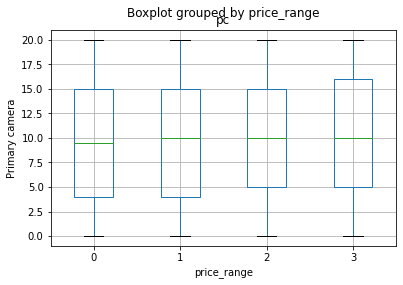

In [ ]:
#creating a box plot for Primary camera vs price range
plt.figure(figsize=(8,10))
df.boxplot(by='price_range', column=['pc'])
plt.ylabel('Primary camera')

FC (front camera megapixels) and PC (Primary camera Megapixels) features distribution is almost similar along all the price ranges but Front Camera megapixals in low cost phones tends to be poorer.

**4G and 3G** 

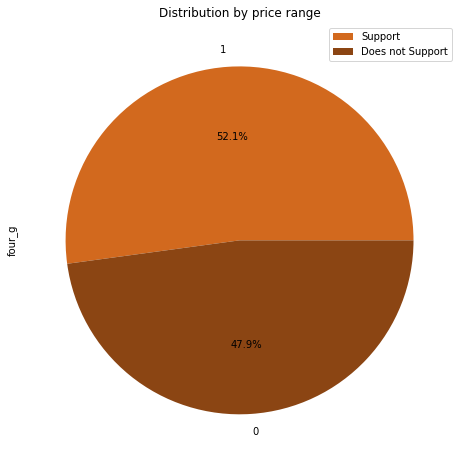

In [ ]:
#creating a pie chart depicting the percentage of phones supporting 4G
plt.figure(figsize=(8,8))
df.four_g.value_counts().plot.pie (autopct='%1.1f%%',colors=('chocolate','saddlebrown'))
plt.title('Distribution by price range')
plt.legend(['Support', 'Does not Support'])

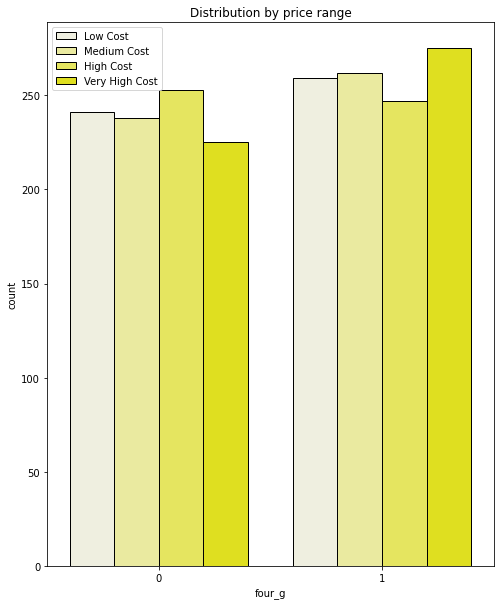

In [ ]:
#Creating a countplot depicting the number of mobile phones supporting 4G in each price range
plt.figure(figsize=(8,10))
sns.countplot(x = df['four_g'], hue = 'price_range', data = df, color = 'yellow',edgecolor='black')
plt.title('Distribution by price range')
plt.xlabel('four_g')
plt.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])

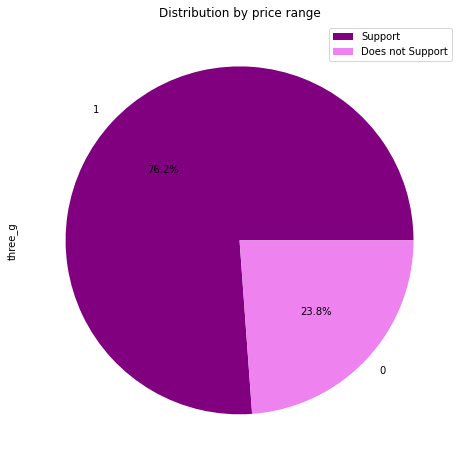

In [ ]:
#creating a pie chart depicting the percentage of phones supporting 3G
plt.figure(figsize=(8,8))
df.three_g.value_counts().plot.pie (autopct='%1.1f%%',colors=('purple','violet'))
plt.title('Distribution by price range')
plt.legend(['Support', 'Does not Support'])

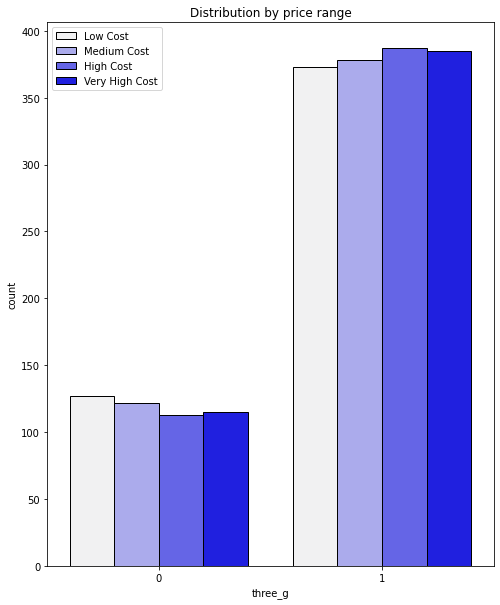

In [ ]:
#Creating a countplot depicting the number of mobile phones supporting 3G in each price range
plt.figure(figsize=(8,10))
sns.countplot(x = df['three_g'], hue = 'price_range', data = df, color = 'blue',edgecolor='black')
plt.title('Distribution by price range')
plt.xlabel('three_g')
plt.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])



*   Mobile phones supporting 4G is evenly distributed among all price ranges therefore it is not an important feature for price prediction
*   3G will be an important feature for price prediction, the countplot shows a disproportionate number of phones supporting 3G from all price ranges compared to the number of phones not supporting 3G. 



**Internal Memory**

<function matplotlib.pyplot.show(*args, **kw)>

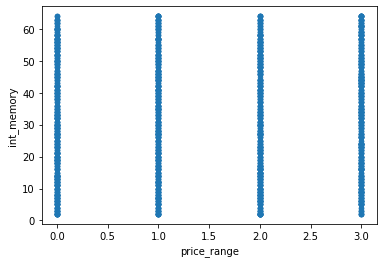

In [ ]:
#creating a scatter plot for internal memory vs price range
df.plot(x='price_range',y='int_memory',kind='scatter')
plt.show

Text(0, 0.5, 'Internal memory')

<Figure size 576x720 with 0 Axes>

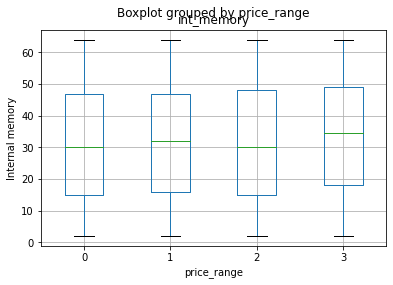

In [ ]:
#creating a box plot for internal memory vs price range
plt.figure(figsize=(8,10))
df.boxplot(by='price_range', column=['int_memory'])
plt.ylabel('Internal memory')

Internal memory is slightly higher in mobile phones falling in the very high price ranges.

**Mobile Depth and Weight**

<function matplotlib.pyplot.show(*args, **kw)>

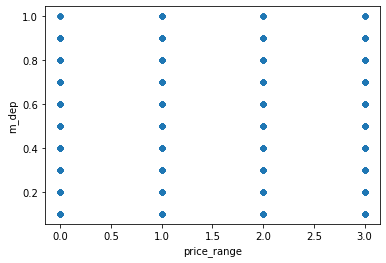

In [ ]:
#creating a scatter plot depicting mobile depth vs price range
df.plot(x='price_range',y='m_dep',kind='scatter')
plt.show

Text(0, 0.5, 'Internal memory')

<Figure size 576x720 with 0 Axes>

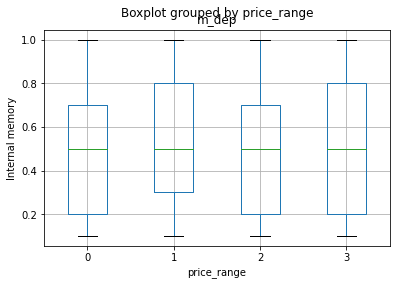

In [ ]:
#creating a box plot for mobile depth vs price range
plt.figure(figsize=(8,10))
df.boxplot(by='price_range', column=['m_dep'])
plt.ylabel('Internal memory')

<function matplotlib.pyplot.show(*args, **kw)>

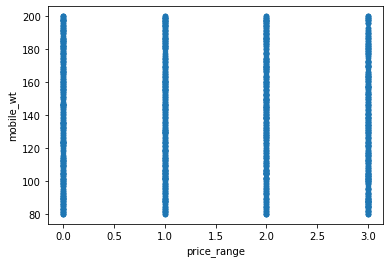

In [ ]:
#creating a scatter plot depicting mobile weight vs price range
df.plot(x='price_range',y='mobile_wt',kind='scatter')
plt.show

Text(0, 0.5, 'Internal memory')

<Figure size 576x720 with 0 Axes>

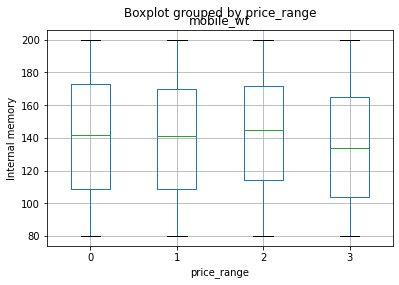

In [ ]:
#creating a box plot for mobile weight vs price range
plt.figure(figsize=(8,10))
df.boxplot(by='price_range', column=['mobile_wt'])
plt.ylabel('Internal memory')



1.   As evident from the above boxplot, mobile phones in Very expensive price range tends to be lighter than phones in expensive price ranges.
2.   Mobile phones in the medium price range and very high range tends to have a greater depth.



**Number of cores in the microprocessor**

<function matplotlib.pyplot.show(*args, **kw)>

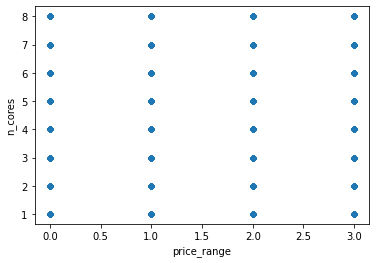

In [ ]:
#creating a scatter plot depicting the number of cores vs price range
df.plot(x='price_range',y='n_cores',kind='scatter')
plt.show

Text(0, 0.5, 'Number of cores')

<Figure size 576x720 with 0 Axes>

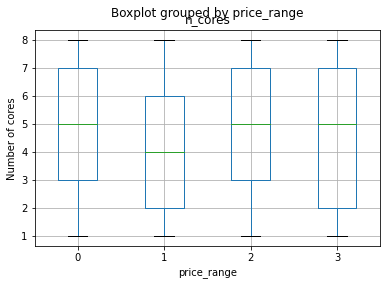

In [ ]:
#creating a box plot for number of cores vs price range
plt.figure(figsize=(8,10))
df.boxplot(by='price_range', column=['n_cores'])
plt.ylabel('Number of cores')

Expensive mobile phones tends to have more number of cores in the microprocessor

**Pixels**

<function matplotlib.pyplot.show(*args, **kw)>

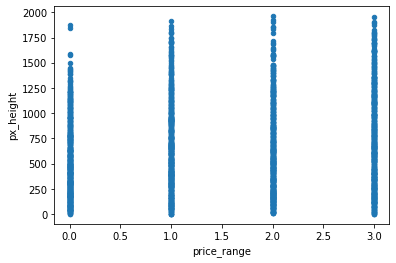

In [ ]:
#creating a scatter plot depicting the pixel heigth vs price range
df.plot(x='price_range',y='px_height',kind='scatter')
plt.show

Text(0, 0.5, 'Pixal height')

<Figure size 576x720 with 0 Axes>

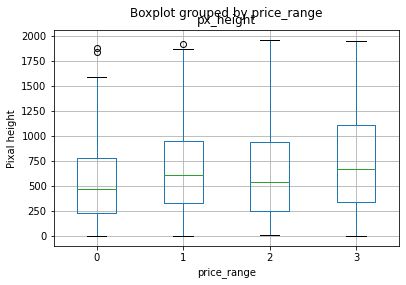

In [ ]:
#creating a box plot for pixel height vs price range
plt.figure(figsize=(8,10))
df.boxplot(by='price_range', column=['px_height'])
plt.ylabel('Pixal height')

<function matplotlib.pyplot.show(*args, **kw)>

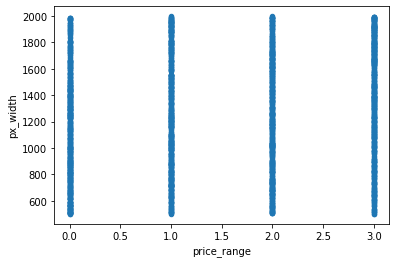

In [ ]:
#creating a scatter plot depicting the pixel width vs price range
df.plot(x='price_range',y='px_width',kind='scatter')
plt.show

Text(0, 0.5, 'Pixal width')

<Figure size 576x720 with 0 Axes>

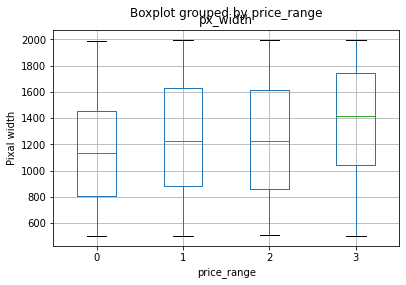

In [ ]:
#creating a box plot for number of pixel width vs price range
plt.figure(figsize=(8,10))
df.boxplot(by='price_range', column=['px_width'])
plt.ylabel('Pixal width')

In [ ]:
df['pixels'] = df['px_height']*df['px_width']

<function matplotlib.pyplot.show(*args, **kw)>

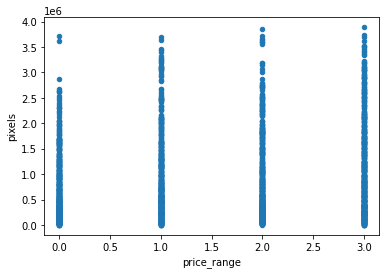

In [ ]:
#creating a scatter plot depicting the pixels vs price range
df.plot(x='price_range',y='pixels',kind='scatter')
plt.show

Text(0, 0.5, 'Pixels ')

<Figure size 576x720 with 0 Axes>

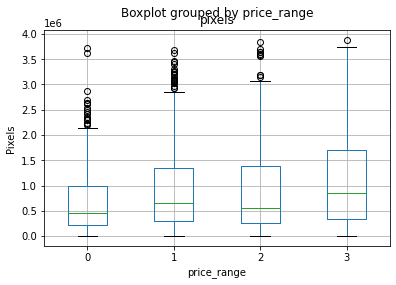

In [ ]:
#creating a box plot for number of pixal width vs price range
plt.figure(figsize=(8,10))
df.boxplot(by='price_range', column=['pixels'])
plt.ylabel('Pixels ')

As evident from the above boxplot, mobiles in higher price range has greater resolution, i.e more pixels
Though there are many outliers in the plot, this is going to be an useful feature to make prediction.

**Screen Dimensions**

<function matplotlib.pyplot.show(*args, **kw)>

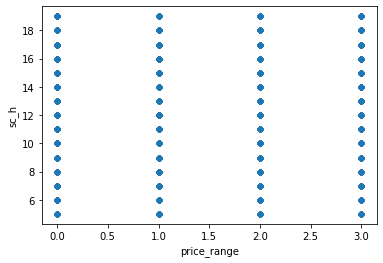

In [ ]:
#creating a scatter plot depicting Screen height vs price range
df.plot(x='price_range',y='sc_h',kind='scatter')
plt.show

Text(0, 0.5, 'screen height')

<Figure size 576x720 with 0 Axes>

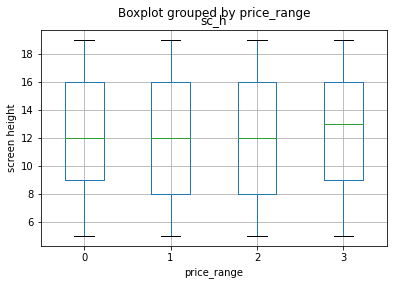

In [ ]:
#creating a box plot for number of Screen height vs price range
plt.figure(figsize=(8,10))
df.boxplot(by='price_range', column=['sc_h'])
plt.ylabel('screen height')

<function matplotlib.pyplot.show(*args, **kw)>

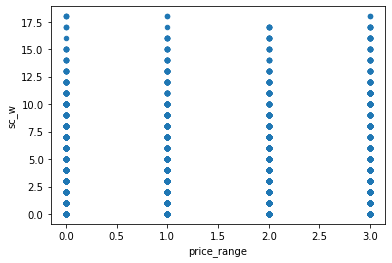

In [ ]:
#creating a scatter plot for number of Screen width vs price range
df.plot(x='price_range',y='sc_w',kind='scatter')
plt.show

Text(0, 0.5, 'screen width')

<Figure size 576x720 with 0 Axes>

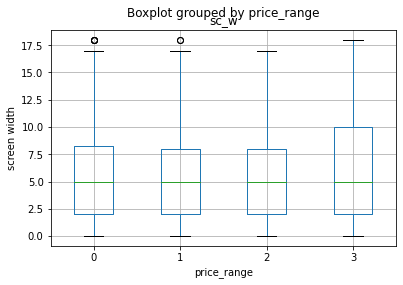

In [ ]:
#creating a box plot for number of Screen width vs price range
plt.figure(figsize=(8,10))
df.boxplot(by='price_range', column=['sc_w'])
plt.ylabel('screen width')

In [ ]:
#creating a new feature "Screen length"
df['sc_l']= np.sqrt(df['sc_h']**2+ df['sc_w']**2) #screen length is measured as the diagonal length of the screen


Text(0, 0.5, 'screen length')

<Figure size 576x720 with 0 Axes>

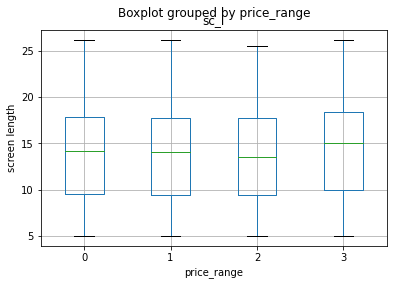

In [ ]:
#creating a box plot for number of Screen length vs price range
plt.figure(figsize=(8,10))
df.boxplot(by='price_range', column=['sc_l'])
plt.ylabel('screen length')

Screen length tends to be higher for phones in the very high price range, so it is an important feature for price prediction.

**RAM(Random Access Memory)**

<function matplotlib.pyplot.show(*args, **kw)>

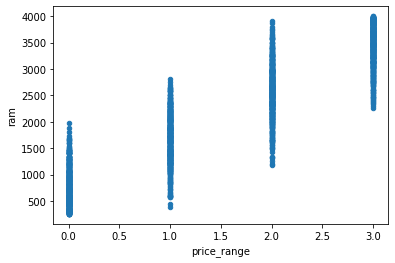

In [ ]:
#creating a scatter plot depicting RAM vs price range
df.plot(x='price_range',y='ram',kind='scatter')
plt.show

Text(0, 0.5, 'RAM')

<Figure size 576x720 with 0 Axes>

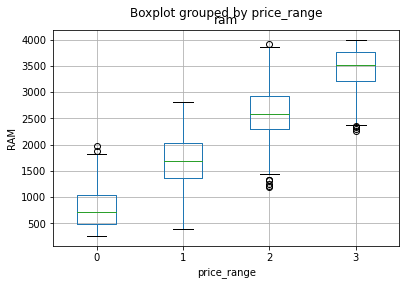

In [ ]:
#creating a scatter plot depicting RAM vs price range
plt.figure(figsize=(8,10))
df.boxplot(by='price_range', column=['ram'])
plt.ylabel('RAM')

As depicted by the above box plot, RAM is definately an important feature for price range prediction

**Touch screen**

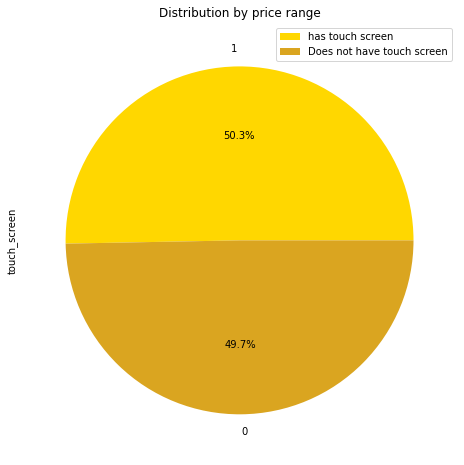

In [ ]:
#creating a pie chart depicting the percentage of phones having touch screen
plt.figure(figsize=(8,8))
df.touch_screen.value_counts().plot.pie (autopct='%1.1f%%',colors=('gold','goldenrod'))
plt.title('Distribution by price range')
plt.legend(['has touch screen', 'Does not have touch screen'])

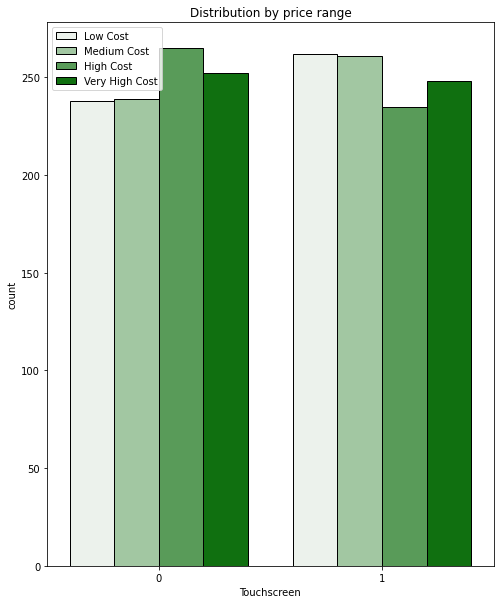

In [ ]:
#creating a count plot depicting number of mobile phones having touch screen feature in each price range
plt.figure(figsize=(8,10))
sns.countplot(x = df['touch_screen'], hue = 'price_range', data = df, color = 'green',edgecolor='black')
plt.title('Distribution by price range')
plt.xlabel('Touchscreen')
plt.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])

**WiFi**

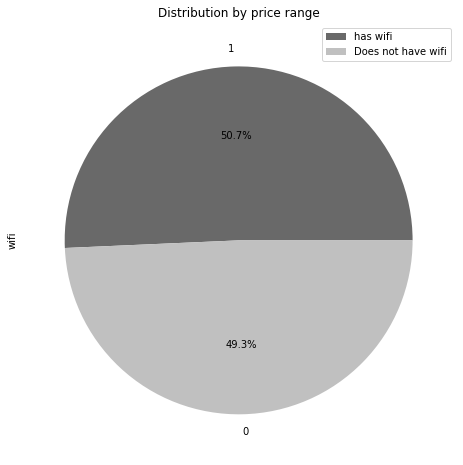

In [ ]:
#creating a pie chart depicting the percentage of phones having wifi
plt.figure(figsize=(8,8))
df.wifi.value_counts().plot.pie (autopct='%1.1f%%',colors=('dimgrey','silver'))
plt.title('Distribution by price range')
plt.legend(['has wifi', 'Does not have wifi'])

Text(0.5, 1.0, 'Percentage of Mobile phones from each price ranges with Bluetooth available ')

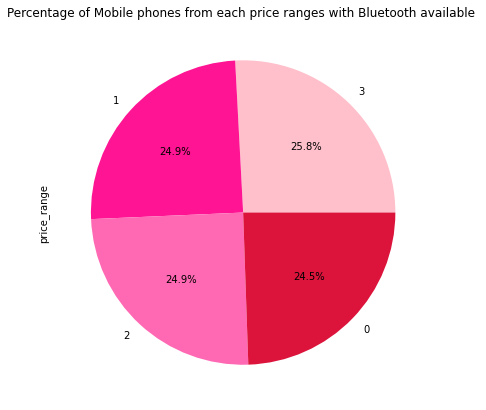

In [ ]:
#Creating a pie chart depicting percentage of mobile phones from each price ranges with wifi available
WiFi= df[df.wifi==1]
plt.figure(figsize=(7,7))
WiFi.price_range.value_counts().plot.pie(colors=('pink','deeppink','hotpink','crimson'),autopct='%1.1f%%')
plt.title('Percentage of Mobile phones from each price ranges with Wifi available ')

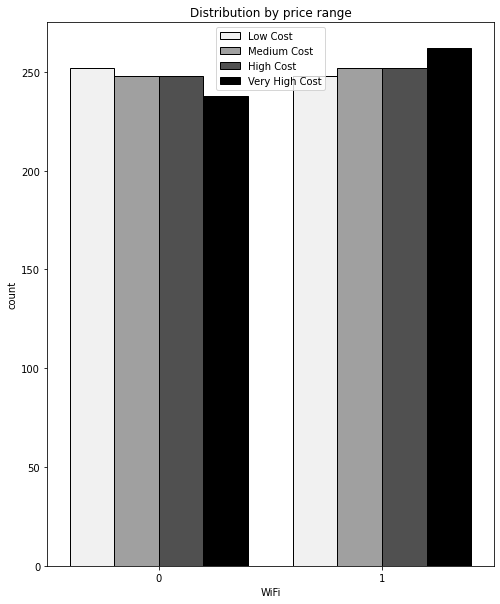

In [ ]:
#creating a count plot depicting number of mobile phones having wifi in each price range
plt.figure(figsize=(8,10))
sns.countplot(x = df['wifi'], hue = 'price_range', data = df, color = 'black',edgecolor='black')
plt.title('Distribution by price range')
plt.xlabel('WiFi')
plt.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])

It seems that wifi feature is pretty evenly distributed among mobile phones of all price ranges, therefor it doesn't seem to be an important feature for price prediction.

Checking correlation between Each Features in dataset on a heatmap.

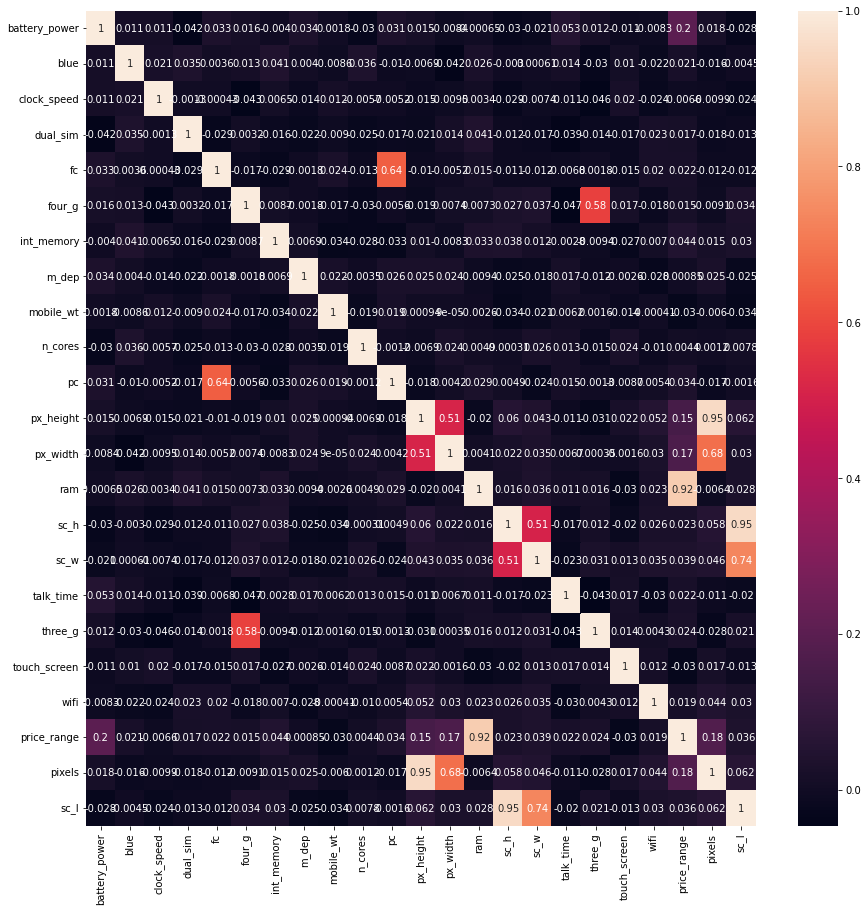

In [ ]:
plt.figure(figsize=(15,15))
Heatmap =sns.heatmap(df.corr(),annot = True)

# **Machine Learning Model Implementation**

Droping unwanted features from the data set and defining Dependent Variables and Independent Variables

In [ ]:
df_new=df.drop(['price_range','px_height','px_width','sc_h','sc_w','talk_time','blue','wifi'],axis=1)
X= df_new
y= df["price_range"]

Test-Train Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.25, shuffle=True)

In [ ]:
X_train.shape

(1500, 14)

In [ ]:
X_test.shape

(500, 14)

In [ ]:
y_train.shape

(1500,)

In [ ]:
y_test.shape

(500,)

Scaling the values

In [ ]:
from sklearn.preprocessing import StandardScaler
scl= StandardScaler()
X_train= scl.fit_transform(X_train)
X_test= scl.transform(X_test)

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Prediction

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred_train= classifier.predict(X_train)

Evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Evaluation metrics for test

print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred, y_test))

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       128
           1       0.77      0.73      0.75       125
           2       0.70      0.68      0.69       123
           3       0.82      0.85      0.83       124

    accuracy                           0.79       500
   macro avg       0.79      0.79      0.79       500
weighted avg       0.79      0.79      0.79       500



In [ ]:
# Evaluation metrics for train

print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       381
           1       0.77      0.79      0.78       374
           2       0.75      0.78      0.76       366
           3       0.91      0.88      0.89       379

    accuracy                           0.84      1500
   macro avg       0.84      0.84      0.84      1500
weighted avg       0.84      0.84      0.84      1500



In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)

print(matrix)

[[116  16   0   0]
 [ 12  91  15   0]
 [  0  18  84  18]
 [  0   0  24 106]]


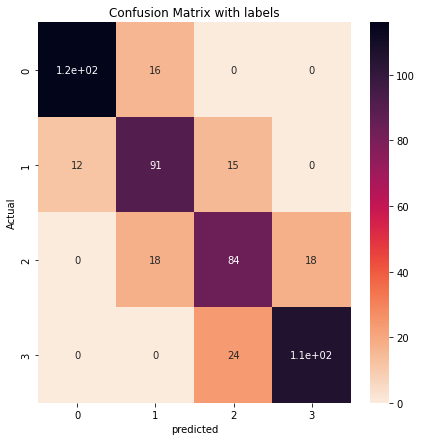

In [ ]:
# Display the visualization of the Confusion Matrix.
plt.figure(figsize=(7,7))
sns.heatmap(matrix, annot=True, cmap='rocket_r')
plt.title('Confusion Matrix with labels')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

Model Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.962


Cross Validation and Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'penalty' : ['l1','l2'],'C': np.logspace(-3,3,7),'solver': ['newton-cg', 'lbfgs', 'liblinear'],}
classifier = LogisticRegression()
clf = GridSearchCV(classifier,param_grid = parameters,scoring='accuracy',cv=3)
clf.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
42 fits failed out of a total of 126.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver 

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [ ]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [ ]:
clf.best_score_

0.8266666666666667

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

Prediction

In [ ]:
y_pred = dtc.predict(X_test)

In [ ]:
y_pred_train= dtc.predict(X_train)

Evaluation

In [ ]:
# Evaluation metrics for test

print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred, y_test))

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       129
           1       0.69      0.68      0.68       120
           2       0.71      0.63      0.67       135
           3       0.75      0.84      0.80       116

    accuracy                           0.75       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.75      0.75      0.75       500



In [ ]:
# Evaluation metrics for train

print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00       382
           2       1.00      1.00      1.00       380
           3       1.00      1.00      1.00       370

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)

print(matrix)

[[110  22   0   0]
 [ 19  81  18   0]
 [  0  17  85  18]
 [  0   0  32  98]]


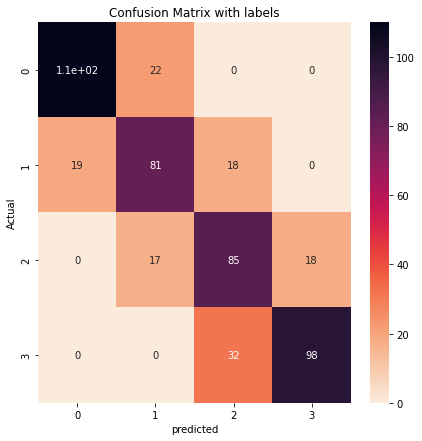

In [ ]:
# Display the visualization of the Confusion Matrix.
plt.figure(figsize=(7,7))
sns.heatmap(matrix, annot=True, cmap='rocket_r')
plt.title('Confusion Matrix with labels')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

Feature Importance

In [ ]:
feature_importance = pd.DataFrame({'Feature':X.columns,'Score':dtc.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance

,Feature,Score
0,ram,0.661816
1,battery_power,0.140527
2,mobile_wt,0.044853
3,int_memory,0.027345
4,m_dep,0.025848
...,...,...
8,n_cores,0.013834
9,three_g,0.006726
10,four_g,0.005368
11,dual_sim,0.005362


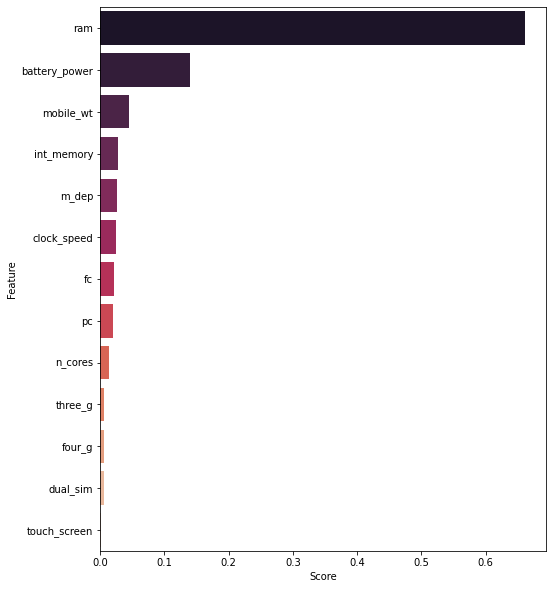

In [ ]:
#Visualisation of feature importance
plt.figure(figsize=(8,10))
sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'],palette="rocket",capsize=10)
plt.show()

Model Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.81


Cross Validation and Hyper parameter tuning

In [ ]:
#Finding the best parameters
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dtc, param_grid = {'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)}, scoring = 'accuracy', cv = 3, verbose = 24)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 1/3; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.838 total time=   0.0s
[CV 2/3; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 2/3; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.796 total time=   0.0s
[CV 3/3; 1/4] START max_depth=5, max_leaf_nodes=10..............................
[CV 3/3; 1/4] END max_depth=5, max_leaf_nodes=10;, score=0.748 total time=   0.0s
[CV 1/3; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 1/3; 2/4] END max_depth=5, max_leaf_nodes=100;, score=0.822 total time=   0.0s
[CV 2/3; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 2/3; 2/4] END max_depth=5, max_leaf_nodes=100;, score=0.808 total time=   0.0s
[CV 3/3; 2/4] START max_depth=5, max_leaf_nodes=100.............................
[CV 3/3; 2/4] END max_depth=5, max_leaf_no

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': (5, 30), 'max_leaf_nodes': (10, 100)},
             scoring='accuracy', verbose=24)

In [ ]:
#predicting using best parameters
y_pred = grid.predict(X_test)
y_pres_train = grid.predict(X_train)


In [ ]:
#calculating model accuracy with the best parameters
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.794


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100) 
rfc.fit(X_train, y_train)

RandomForestClassifier()

Prediction

In [ ]:
y_pred = rfc.predict(X_test)
y_pred_train= rfc.predict(X_train)

Evalution

In [ ]:
# Evaluation metrics for test

print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred, y_test))

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       137
           1       0.70      0.72      0.71       116
           2       0.68      0.64      0.66       126
           3       0.80      0.86      0.83       121

    accuracy                           0.78       500
   macro avg       0.77      0.78      0.77       500
weighted avg       0.78      0.78      0.78       500



In [ ]:
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       368
           1       1.00      1.00      1.00       382
           2       1.00      1.00      1.00       380
           3       1.00      1.00      1.00       370

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)

print(matrix)

[[121  11   0   0]
 [ 16  83  19   0]
 [  0  22  81  17]
 [  0   0  26 104]]


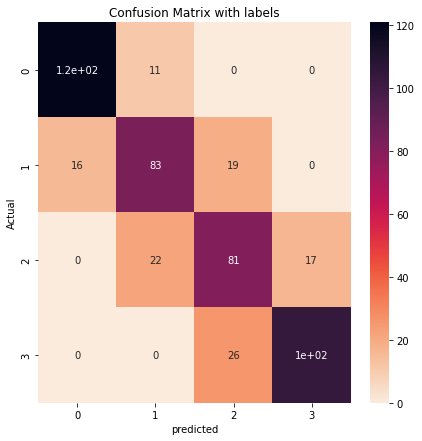

In [ ]:
# Display the visualization of the Confusion Matrix.
plt.figure(figsize=(7,7))
sns.heatmap(matrix, annot=True, cmap='rocket_r')
plt.title('Confusion Matrix with labels')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

Feature Importance

In [ ]:
feature_importance = pd.DataFrame({'Feature':X.columns,'Score':rfc.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance

,Feature,Score
0,ram,0.511934
1,battery_power,0.102058
2,mobile_wt,0.065306
3,int_memory,0.061869
4,clock_speed,0.047337
...,...,...
8,n_cores,0.037393
9,dual_sim,0.012050
10,touch_screen,0.011700
11,four_g,0.011375


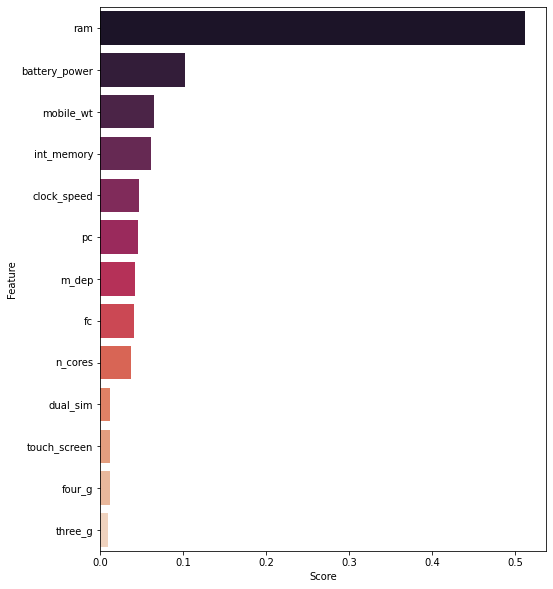

In [ ]:
#Visualisation of feature importance
plt.figure(figsize=(8,10))
sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'],palette="rocket",capsize=10)
plt.show()

Model Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.874


Cross Validation and Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
HPT = {'n_estimators':[10,50,100,200],'max_depth':[10,20,30,40],'min_samples_split':[2,4,6],'max_features':['sqrt',4,'log2','auto'],'max_leaf_nodes':[10, 20, 40]}
RFC = RandomForestClassifier()
CLSR = GridSearchCV(RFC, HPT, scoring='accuracy', cv=3)
CLSR.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [10, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [ ]:
CLSR.best_params_

{'max_depth': 20,
 'max_features': 4,
 'max_leaf_nodes': 40,
 'min_samples_split': 6,
 'n_estimators': 200}

In [ ]:
CLSR.best_score_

0.8149994072033052

**K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

Prediction

In [ ]:
y_pred= knn.predict(X_test)
y_pred_train=knn.predict(X_train)

In [ ]:
# Evaluation metrics for test

print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred, y_test))

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       133
           1       0.48      0.39      0.43       145
           2       0.40      0.38      0.39       127
           3       0.55      0.75      0.63        95

    accuracy                           0.54       500
   macro avg       0.53      0.55      0.54       500
weighted avg       0.53      0.54      0.53       500



In [ ]:
# Evaluation metrics for train
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       407
           1       0.66      0.63      0.65       398
           2       0.65      0.66      0.65       375
           3       0.74      0.86      0.80       320

    accuracy                           0.72      1500
   macro avg       0.73      0.73      0.73      1500
weighted avg       0.73      0.72      0.72      1500



In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)

print(matrix)

[[93 34  5  0]
 [34 57 25  2]
 [ 6 44 48 22]
 [ 0 10 49 71]]


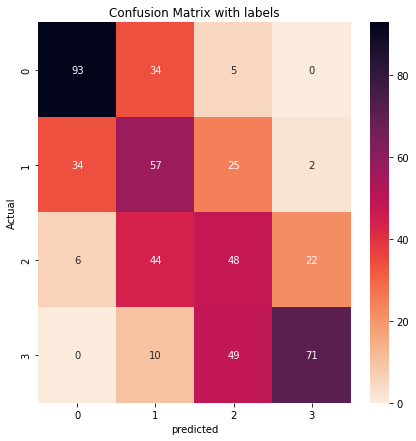

In [ ]:
# Display the visualization of the Confusion Matrix.
plt.figure(figsize=(7,7))
sns.heatmap(matrix, annot=True, cmap='rocket_r')
plt.title('Confusion Matrix with labels')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

Model Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.518


Cross Validation and Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1,10))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [ ]:
grid_search.best_params_

{'n_neighbors': 9}

In [ ]:
grid_search.best_score_

0.5513333333333333

**Support Vector Machine(SVM)**

In [ ]:
from sklearn.svm import SVC

svm = SVC(C=0.1,kernel='linear',gamma='auto')
svm.fit(X_train, y_train)

SVC(C=0.1, gamma='auto', kernel='linear')

Prediction

In [ ]:
y_predict=svm.predict(X_test)
y_predict_train=svm.predict(X_train) 

In [ ]:
# Evaluation metrics for test

print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred, y_test))

Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       133
           1       0.48      0.39      0.43       145
           2       0.40      0.38      0.39       127
           3       0.55      0.75      0.63        95

    accuracy                           0.54       500
   macro avg       0.53      0.55      0.54       500
weighted avg       0.53      0.54      0.53       500



In [ ]:
#Evalution metrics for train
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       407
           1       0.66      0.63      0.65       398
           2       0.65      0.66      0.65       375
           3       0.74      0.86      0.80       320

    accuracy                           0.72      1500
   macro avg       0.73      0.73      0.73      1500
weighted avg       0.73      0.72      0.72      1500



In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)

print(matrix)

[[93 34  5  0]
 [34 57 25  2]
 [ 6 44 48 22]
 [ 0 10 49 71]]


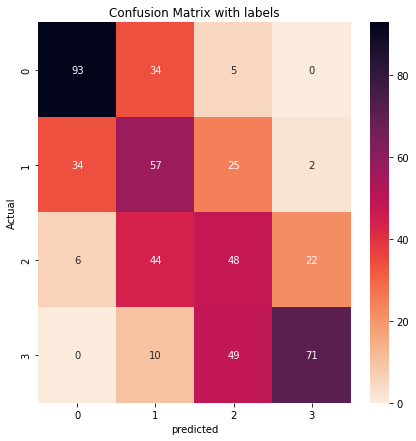

In [ ]:
# Display the visualization of the Confusion Matrix.
plt.figure(figsize=(7,7))
sns.heatmap(matrix, annot=True, cmap='rocket_r')
plt.title('Confusion Matrix with labels')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

Model Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.538


Cross Validation and Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
  
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.257 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.257 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.253 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.253 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.253 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.680 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.660 total time=   0.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.663 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.393 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [ ]:
grid.best_score_

0.8240000000000001

# **Conclusion**

As we can see, Logistic Regression gives the best result with an accuracy of 0.96 compared to all other models implemented.